<a href="https://www.kaggle.com/code/anshudhiman/knn-kidney-stone-prediction?scriptVersionId=126746545" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# KNN- Kidney Stone Analysis 

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../input/kidney-stone-prediction-based-on-urine-analysis/kindey stone urine analysis.csv")

In [3]:
# Preview of the data
df.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


# EDA

In [4]:
#Checking for null values
df.isnull().sum()

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [5]:
# checking the shape of the data
print("shape :" , df.shape)
print("Rows :", df.shape[0])
print("Columns :", df.shape[1])

shape : (79, 7)
Rows : 79
Columns : 7


In [6]:
# Getting the statistical properties

df.describe()

,gravity,ph,osmo,cond,urea,calc,target
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,1.018114,6.028481,612.848101,20.813924,266.405063,4.138987,0.430380
std,0.007239,0.724307,237.514755,7.938994,131.254550,3.260051,0.498293
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012000,5.530000,413.000000,14.150000,160.000000,1.460000,0.000000
50%,1.018000,5.940000,594.000000,21.400000,260.000000,3.160000,0.000000
75%,1.023500,6.385000,792.000000,26.550000,372.000000,5.930000,1.000000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


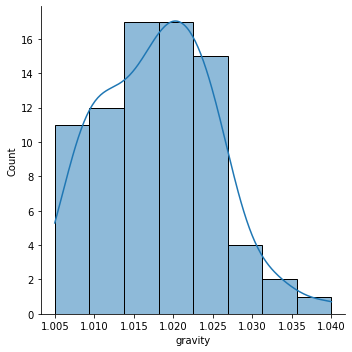

In [7]:
#Indentifing columns in "Gravity"
sns.displot(df['gravity'], kde = True)  # kde stands for kernel density estimation

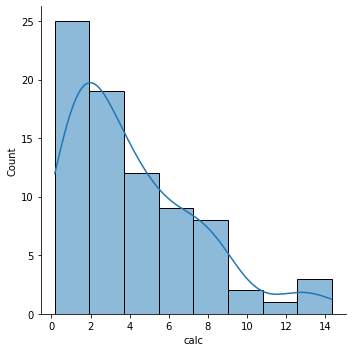

In [8]:
sns.displot(df['calc'], kde = True)

* ### There are not significant outliers in ph column
*  ### 'calc' is positively skewed 


In [9]:
#checking composition of data
df['target'].value_counts()

0    45
1    34
Name: target, dtype: int64

In [10]:
(45/79)

0.569620253164557

# Performing Min max Scaling

In [11]:
#Importing required library
from sklearn.preprocessing import MinMaxScaler 

model = MinMaxScaler()
df.iloc[:, :6] = model.fit_transform(df.iloc[: , :6])
df.head()

,gravity,ph,osmo,cond,urea,calc,target
0,0.457143,0.047170,0.512869,0.270517,0.709836,0.160903,0
1,0.342857,0.308176,0.371783,0.452888,0.468852,0.304869,0
2,0.085714,0.767296,0.127741,0.297872,0.149180,0.154552,0
3,0.171429,0.235849,0.210677,0.227964,0.350820,0.139732,0
4,0.000000,0.553459,0.000000,0.072948,0.132787,0.069866,0


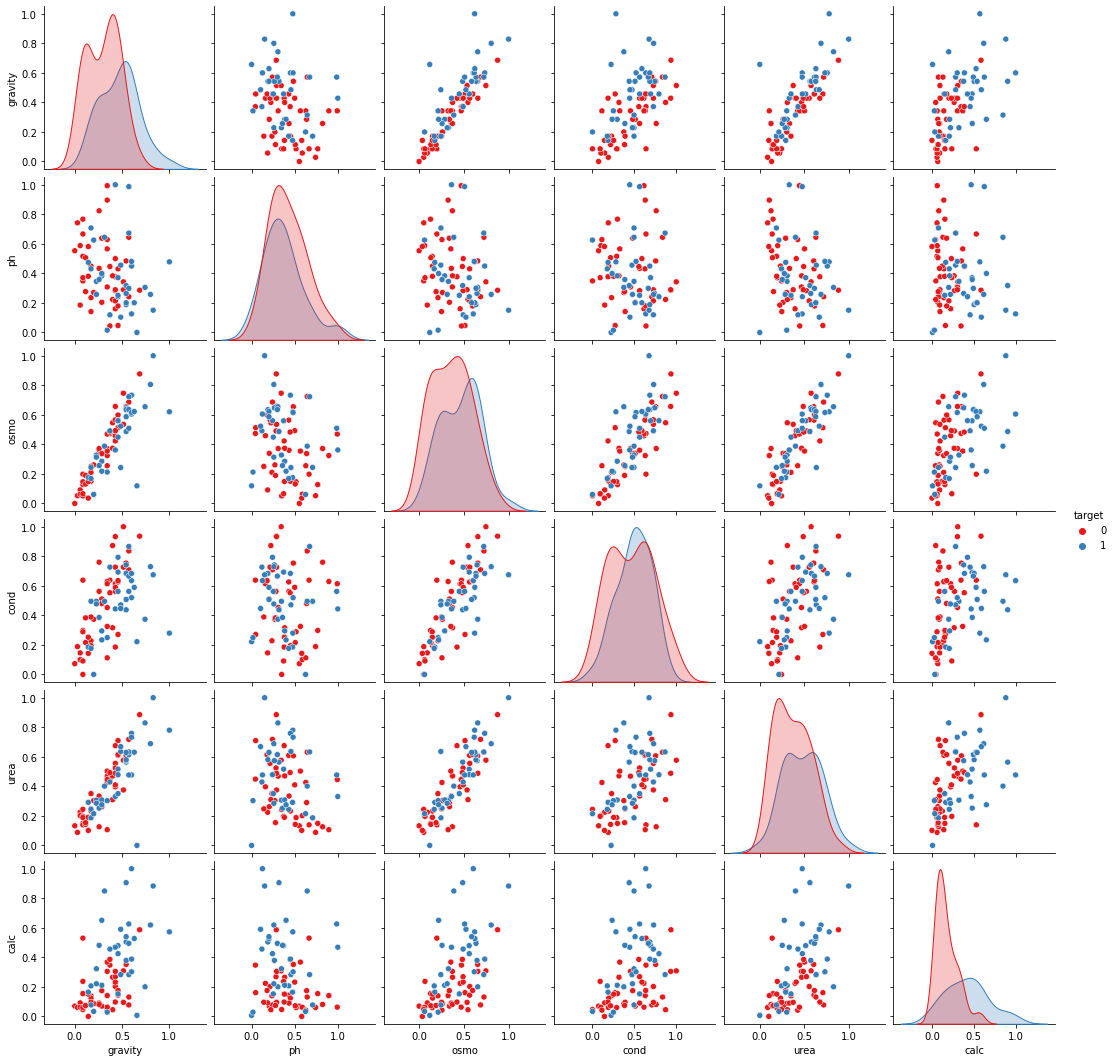

In [12]:
sns.pairplot(df,hue = "target",palette = "Set1" )

* ### People  with kidney stone are having higher calcium concentration
* ### there is a strong  positive correlation between osmo and cond.
* ### there is a strong  positive correlation between osmo and calc.
* ### there is a strong  positive correlation between osmo and urea.

# Declare input,output variables 

In [13]:
# Separating Input and Output Variables
x = df.iloc[:, :6]
y = df['target']

 # Performing train test split

In [14]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.1 , random_state = 7)

In [15]:
#Getting optimal value of k 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc = []
for i in range (3,50):
  model = KNeighborsClassifier(n_neighbors = i)
  model.fit(x_train, y_train)
  train_acc = (accuracy_score(model.predict(x_train), y_train))
  test_acc = (accuracy_score(model.predict(x_test), y_test))
  acc.append([train_acc, test_acc])
print('Accuracy :\n', acc)


Accuracy :
 [[0.8591549295774648, 1.0], [0.8028169014084507, 1.0], [0.7746478873239436, 1.0], [0.7605633802816901, 1.0], [0.7887323943661971, 1.0], [0.7464788732394366, 1.0], [0.7605633802816901, 1.0], [0.7323943661971831, 1.0], [0.7605633802816901, 0.875], [0.6901408450704225, 0.875], [0.7323943661971831, 0.875], [0.7183098591549296, 0.875], [0.7746478873239436, 0.875], [0.7323943661971831, 0.875], [0.7323943661971831, 0.875], [0.7183098591549296, 0.875], [0.7183098591549296, 0.875], [0.704225352112676, 0.875], [0.704225352112676, 0.875], [0.6619718309859155, 0.875], [0.676056338028169, 0.875], [0.647887323943662, 0.875], [0.6901408450704225, 0.875], [0.676056338028169, 0.875], [0.704225352112676, 0.875], [0.6619718309859155, 0.875], [0.7183098591549296, 1.0], [0.704225352112676, 1.0], [0.704225352112676, 1.0], [0.6619718309859155, 1.0], [0.6901408450704225, 1.0], [0.6619718309859155, 0.875], [0.6901408450704225, 1.0], [0.6619718309859155, 0.875], [0.6901408450704225, 1.0], [0.6760563

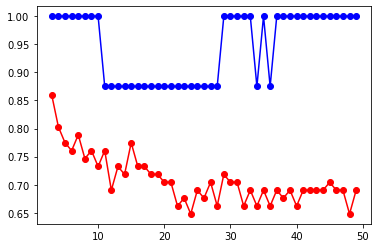

In [16]:
# plot for optimal value of k
plt.plot(np.arange(3, 50, 1), [i[0] for i in acc], 'ro-')
plt.plot(np.arange(3, 50, 1), [i[1] for i in acc], 'bo-')
plt.show()

In [17]:
#optimal value of k is 3

# Create an optimal kNN model

In [18]:
model = KNeighborsClassifier(n_neighbors = 3)

#Fitting the model
model.fit(x_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [19]:
#Predicting from the model
y_pred = model.predict(x_test)

In [20]:
# Getting the accuracy
print('Accuracy :', accuracy_score(y_test, y_pred))

Accuracy : 1.0


# Creating the model- Bagging Classifier

In [21]:
#Initialization
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator = model, n_estimators = 100,
                          bootstrap = True,
                          n_jobs = -1,
                          random_state = 7)

#Fitting the model
model.fit(x_train, y_train)


BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),
                  n_estimators=100, n_jobs=-1, random_state=7)

# predicting from the model

In [22]:
y_pred = model.predict(x_test) 

# Getting the accuracy

In [23]:
print('Accuracy :', accuracy_score(y_test, y_pred))


Accuracy : 0.875


### Its an end to this Kernel. Give your valuable feedback for improvements .